**Information Processing**: First Laboratory Exercise

Rivers are of great economic importance, from thermal power plants and nuclear power plants that need rivers to operate, public water supply to agriculture and transport. Although people today largely manage watercourses, weather conditions can lead to flooding, soil erosion and similar natural disasters. In order to be able to prepare for potential problems, it is necessary to investigate the behavior of the river based on multi-year monitoring of water levels. In this laboratory exercise, you will analyze the water levels of the Sava River over a period of 25 years.

Within the compressed directory with this notebook, a .mat file with data on the water level of the Sava River in the period from January 1st, 1982, to December 31st, 2007, is located. Each data row indicates one day of water level measurement.

The exercise is conducted in Python/Google Colab, and all the commands needed to conduct the exercise are given in the lecture. This laboratory exercise brings 3 points. 

When you are done with the exercise, place a .pdf report (you can generate a .pdf report with the command File-Print-Location: PDF) on your *Moodle*.

**1.** Import libraries: NumPy, matplotlib.pyplot, scipy.fft, signal from scipy, and pywt.

In [36]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import signal 
from scipy import fftpack
import  pywt

**2.** Load water level information from the .mat file from the compressed directory. Loaded data are saved in dictionary. Extract the key and the corresponding water level data and reduce the dimension if necessary.

Tip: Import the .mat file from your Google Drive (place the .mat file within the Colab Notebooks folder on your Google Drive). Other tips can be found in the following code section.

In [21]:
#After running this code section, a link will appear in the window below. Click on the link, sign in with your Google account, and you will
#get the code. You need to copy the code and paste it into the output below this window (in the "Enter your authorization code: " window). 
#After entering the received code, the message "Mounted at /content/drive" will appear.
#If you have the file "OIkobas.mat" saved in such a Colab Notebook directory, you can access it with the following lines of code:
#from scipy import io
#kobas_iz_matlaba=io.loadmat("drive/My Drive/Colab Notebooks/OIkobas.mat")
#print(kobas_iz_matlaba)

from scipy import io
kobas_iz_matlaba = io.loadmat("./3_OIkobas.mat")
print(kobas_iz_matlaba)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Sat Oct 10 13:46:29 2020', '__version__': '1.0', '__globals__': [], 'kobas': array([[661],
       [674],
       [685],
       ...,
       [242],
       [230],
       [228]], dtype=uint16)}


**3.**	Print: number of days for which water level data are available, mean water level, standard deviation, minimum value, maximum value, and median.

In [33]:
water_level = kobas_iz_matlaba['kobas'].flatten()
water_level 
print("Number of days:", len(water_level))
print("Mean water level:", np.mean(water_level))
print("Standard deviation:", np.std(water_level))
print("Minimum value:", np.min(water_level))
print("Maximum value:", np.max(water_level))
print("Median:", np.median(water_level))

Number of days: 9496
Mean water level: 294.25758213984835
Standard deviation: 183.09167165945507
Minimum value: 17
Maximum value: 878
Median: 255.0


**4.**	Plot the water level. Mark the x and y axes and the title of the figure.

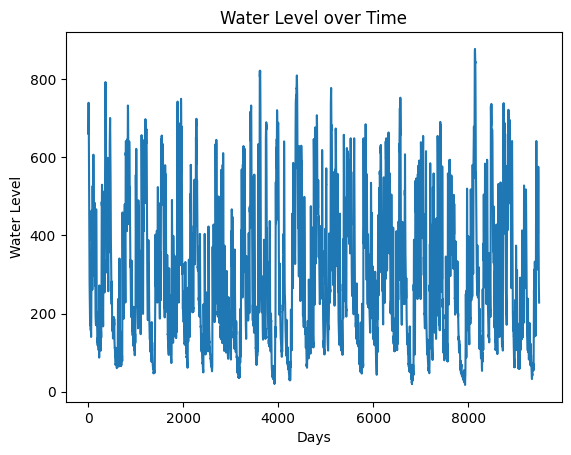

In [34]:
plt.figure()
plt.plot(water_level)
plt.xlabel("Days")
plt.ylabel("Water Level")
plt.title("Water Level over Time")
plt.show()

**5.**	Calculate the discrete Fourier transform of a given water level. Print the obtained values. Plot the absolute value of the obtained coefficients.

Water level fft : [2794270.            -0.j           -9312.52756202+49784.33987081j
   80617.82235263-75905.53826228j ...  -75144.8689581 -18406.78122837j
   80617.82235263+75905.53826228j   -9312.52756202-49784.33987081j]
Frequencies : [ 0.          0.00010531  0.00021061 ... -0.00031592 -0.00021061
 -0.00010531]


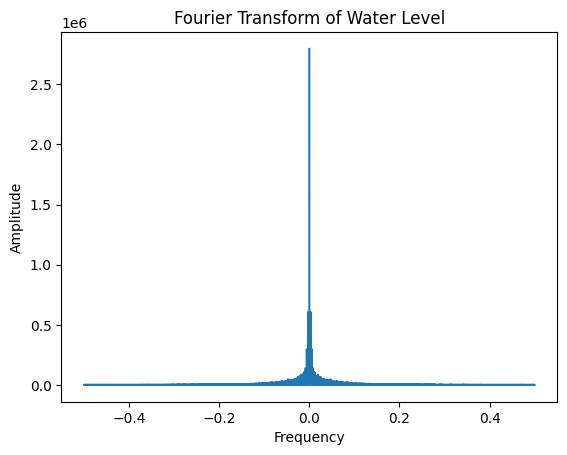

In [38]:
water_level_fft = fftpack.fft(water_level)
print(f"Water level fft : {water_level_fft}")
frequencies = fftpack.fftfreq(len(water_level))
print(f"Frequencies : {frequencies}")
plt.figure()
plt.plot(frequencies, np.abs(water_level_fft))
plt.title("Fourier Transform of Water Level")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

**6.**	Calculate the Short time Fourier transform of a given water level using a rectangular window, 2 years wide. Show the result using pcolormesh. Answer: what frequencies are visible in the water level? What years do they occur?

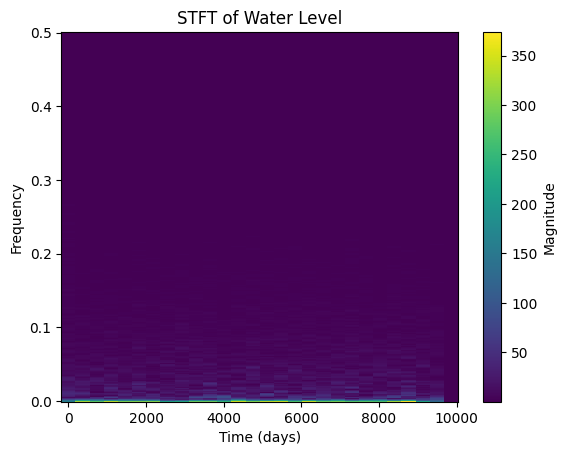

In [40]:
f, t, Zxx = signal.stft(water_level, nperseg=730)  # 2 godine = 2*365
plt.pcolormesh(t, f, np.abs(Zxx))
plt.title("STFT of Water Level")
plt.xlabel("Time (days)")
plt.ylabel("Frequency")
plt.colorbar(label="Magnitude")
plt.show()

ANSWER: *Answer here to questions from Task 6.*



**7.**	Use a different window (of your choice) and repeat the previous task. Print the width of the used window. Explain the differences in the obtained figures.

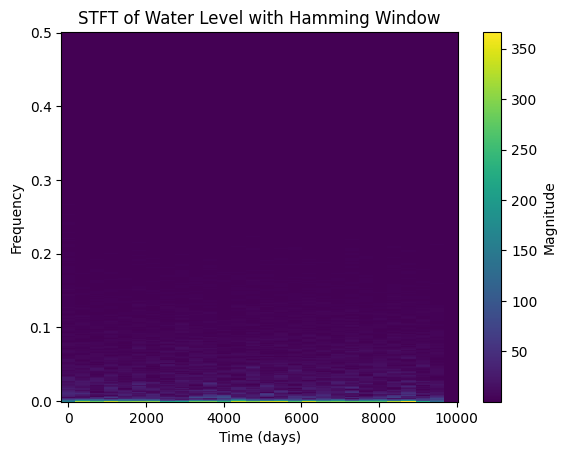

In [43]:
f, t, Zxx_hamming = signal.stft(water_level, nperseg=730, window='hamming')  # Using Hamming window
plt.pcolormesh(t, f, np.abs(Zxx_hamming))
plt.title("STFT of Water Level with Hamming Window")
plt.xlabel("Time (days)")
plt.ylabel("Frequency")
plt.colorbar(label="Magnitude")
plt.show()

ANSWER: *Answer here to question from Task 7.*

**8.**	List all continuous wavelet families in the PyWavelets library. In the same figure, using the subplot, plot two wavelet functions of your choice. Write which wavelet is shown in the title of each subplot.

Wavelet families: ['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']


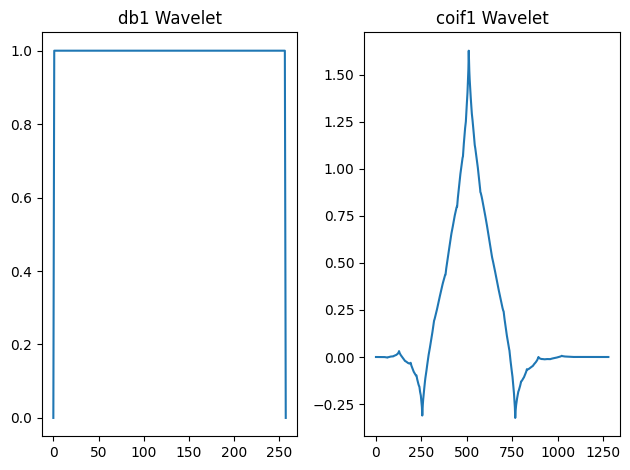

In [46]:
print("Wavelet families:", pywt.families())

wavelet_1 = pywt.Wavelet('db1')
wavelet_2 = pywt.Wavelet('coif1')
plt.subplot(1, 2, 1)
plt.plot(wavelet_1.wavefun()[0])
plt.title("db1 Wavelet")

plt.subplot(1, 2, 2)
plt.plot(wavelet_2.wavefun()[0])
plt.title("coif1 Wavelet")
plt.tight_layout()
plt.show()


**9.**	Using a Morlet wavelet, determine the continuous wavelet transformation of a given water level. Plot the absolute value of the obtained coefficients. Answer: what frequencies are visible in the water level? What years do they occur?

C:\Users\Marko Haralović\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


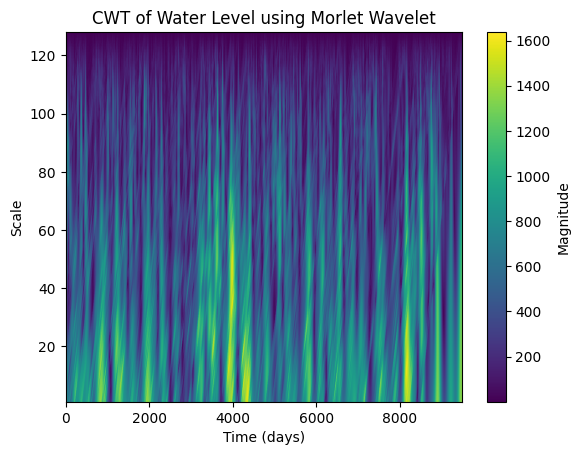

In [47]:
coefficients, frequencies = pywt.cwt(water_level, np.arange(1, 128), 'cmor')
plt.imshow(np.abs(coefficients), aspect='auto', extent=[0, len(water_level), 1, 128])
plt.colorbar(label="Magnitude")
plt.title("CWT of Water Level using Morlet Wavelet")
plt.xlabel("Time (days)")
plt.ylabel("Scale")
plt.show()

ANSWER: *Answer here to questions from Task 9.*


**10.**	Answer: explain the difference in the obtained STFT and CWT results.

ANSWER: Both STFT and CWT give time-frequency representations of the signal. However, STFT has a fixed resolution across all frequencies, while CWT offers multi-resolution analysis, which can be beneficial for signals with non-stationary content.